# ANALYZE BIOMODELS SUBNETS

In [31]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import tellurium as te

import pySubnetSB.constants as cn
from pySubnetSB.network import Network

# Data Preparation

In [3]:
PATH = os.path.join(cn.PROJECT_DIR, "biomodels_subnet_initial.csv")
df = pd.read_csv(PATH)
df.head()

,reference_name,target_name,reference_network,induced_network,name_dct,num_assignment_pair,is_truncated
0,BIOMD0000000191,BIOMD0000000146,NaN,NaN,NaN,NaN,False
1,BIOMD0000000191,BIOMD0000000807,NaN,NaN,NaN,NaN,False
2,BIOMD0000000191,BIOMD0000000595,NaN,NaN,NaN,NaN,False
3,BIOMD0000000191,BIOMD0000000998,NaN,NaN,NaN,NaN,False
4,BIOMD0000000191,BIOMD0000000806,NaN,NaN,NaN,NaN,False


In [24]:
REFERENCE_NAMES = (df['reference_name'].unique())
NUM_REFERENCE = len(REFERENCE_NAMES)
TARGET_NAMES = (df['target_name'].unique())
NUM_TARGET = len(TARGET_NAMES)
NUM_REFERENCE, NUM_TARGET

(18, 489)

In [6]:
SUBNET_DF = df[df['num_assignment_pair'] > 0]
SUBNET_DF = SUBNET_DF.copy()
SUBNET_DF = SUBNET_DF.reset_index()
SUBNET_DF.head()

,index,reference_name,target_name,reference_network,induced_network,name_dct,num_assignment_pair,is_truncated
0,78,BIOMD0000000191,BIOMD0000000687,"BIOMD0000000191: 3 species, 5 reactions\n Arg...","2876666: 3 species, 5 reactions\n Infected_ce...","{""species_names"": {""ORN"": ""y_0"", ""ARGin"": ""L_0...",10.0,False
1,998,BIOMD0000000225,BIOMD0000000687,"BIOMD0000000225: 5 species, 3 reactions\n vgk...","3920388: 5 species, 3 reactions\n Infection_2...","{""species_names"": {""G6P_F6P"": ""L_0"", ""FBP"": ""y...",11.0,False
2,1046,BIOMD0000000225,BIOMD0000000320,"BIOMD0000000225: 5 species, 3 reactions\n vgk...","8660264: 5 species, 3 reactions\n benserazide...","{""species_names"": {""G6P_F6P"": ""C1_B"", ""FBP"": ""...",5.0,False
3,1652,BIOMD0000000967,BIOMD0000000726,"BIOMD0000000967: 4 species, 9 reactions\n R_D...","211519: 4 species, 9 reactions\n reaction_5: ...","{""species_names"": {""R"": ""S_d"", ""L"": ""E_d"", ""E""...",1.0,False
4,1654,BIOMD0000000967,BIOMD0000000852,"BIOMD0000000967: 4 species, 9 reactions\n R_D...","8413826: 4 species, 9 reactions\n HSC_Prolife...","{""species_names"": {""R"": ""x0"", ""L"": ""y0"", ""E"": ...",2.0,False


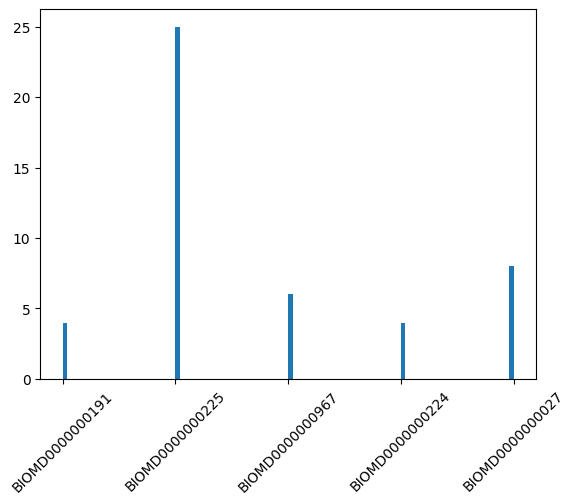

In [19]:
# Number of targets
_ = plt.hist(SUBNET_DF['reference_name'], bins=100)
_ = plt.xticks(rotation=45)

In [51]:
def makeAntimony(model_name:str, is_reference:bool=True, is_roadrunner_loadable:bool=False):
    """
    Transforms the string in a "network" cell into an antimony model
    """
    if is_reference:
        name_col = 'reference_name'
        network_col = 'reference_network'
    else:
        name_col = 'target_name'
        network_col = 'induced_network'
    models =  SUBNET_DF[SUBNET_DF[name_col] == model_name][network_col].values
    if len(models) == 0:
        import pdb; pdb.set_trace()
    model = models[0]
    if is_roadrunner_loadable:
        pos = model.index('tions\n')
        model = model[pos+7:]
        model = model.replace('\n', ';1\n')
        model += ";1;"
    return model

model = makeAntimony('BIOMD0000000967', is_roadrunner_loadable=True)
rr = te.loada(model)


In [54]:
for name in ['BIOMD0000000967', 'BIOMD0000000225', 'BIOMD0000000191', 'BIOMD0000000224', 'BIOMD0000000027']:
    print(makeAntimony(name))
    print('\n\n')

BIOMD0000000967: 4 species, 9 reactions
  R_Death: R -> 
  R_Birth:  -> R
  R_to_L: R -> L
  R_to_E: R -> E
  L_Death: L -> 
  L_to_E: L -> E
  E_Death: E -> 
  V_Death: V -> 
  V_Creation:  -> V



BIOMD0000000225: 5 species, 3 reactions
  vgk: GLC -> G6P_F6P
  vpfk: G6P_F6P -> FBP
  vfba: FBP -> G3P



BIOMD0000000191: 3 species, 5 reactions
  Arginase: ARGin -> ORN
  Arginine_transport: ARGex -> ARGin
  Ornithine_efflux: ORN -> 
  NOS: ARGin -> 
  ODC: ORN -> 



BIOMD0000000224: 4 species, 6 reactions
  JChannel: CaS -> CaI
  JPump: CaI -> CaS
  kPLC:  -> IP3
  kPhosphatase: IP3 -> 
  inhibition_parameter1:  -> g
  inhibition_parameter2: g -> 



BIOMD0000000027: 5 species, 4 reactions
  v1: M -> Mp
  v2: Mp -> Mpp
  v3: Mpp -> Mp
  v4: Mp -> M





In [53]:
REFERENCE_NAMES


array(['BIOMD0000000191', 'BIOMD0000000387', 'BIOMD0000000224',
       'BIOMD0000000556', 'BIOMD0000000026', 'BIOMD0000000967',
       'BIOMD0000000966', 'BIOMD0000000755', 'BIOMD0000000027',
       'BIOMD0000000231', 'BIOMD0000000225', 'BIOMD0000000386',
       'BIOMD0000000812', 'BIOMD0000000184', 'BIOMD0000000609',
       'BIOMD0000000186', 'BIOMD0000000353', 'BIOMD0000000384'],
      dtype=object)